In [1]:
import pandas as pd
file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep='\t') #csv 는 콤마로 구분/tsv는 tab으로 구분
print(chipo.shape)
print('------------------')
print(chipo.info())

(4622, 5)
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


DataFrame형태로 자료를 읽어온다

자료 읽을때는 read_csv() 함수를 사용하여 읽어옴

shape는 데이터의 행과 열의 크기를 반환, info()함수는 행 열 의 구성정보를 나타냄

자료 4622개 
null(결측값) 4622-3376 개

<h1>1단계) 탐색 >> 데이터의 기초 정보 살펴보기</h1>

order_id  주문 번호

quantity 아이템 주문 수량

item_name 주문한 아이템 이름

choice_description 주문한 아이템 상세 옵션 선택

item_price 아이템 가격 정보

In [2]:
chipo.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Quantity 와 item_price의 수치적 특징

두 컬럼은 연속적 피처이다. 연속적 피처는 어떤값도 가질수 있는 연속적 숫자 형태를 의미

In [3]:
print(chipo.columns)
print('=========================================')
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


describe() 함수는 피처의 기초 통계량을 나타냄

수치형 피처는 quantity뿐이여서 quantity만 출력함

In [4]:
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [5]:
#unique 함수로 범주형 피처 개수 출력
print(len(chipo['order_id'].unique())) #갯수 출력
print(len(chipo['item_name'].unique())) #갯수 출력

1834
50


<h1>2단계) 인사이트의 발견 >>> 탐색과 시각화</h1>

가장많이 주문한 아이템 TOP10 을 분석하기 위해서는
DataFarame['column'] 형태의 value_counts() 함수를 적용하는 방식을 사용한다.

DataFarame['column']은 시리즈(series)라는 객체를 반환하는데, value_counts() 함수는 시리즈 객체에만 적용됨


In [6]:
#가장 많이 주문한 item top10 출력
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


Groupby()함수를 이용하여 아이템별 주문 개수와 총량을 구함

Groupby()함수는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하며 이를 통해 그룹별 연선을 적용할 수 있다.

In [7]:
#아이템별 주문 개수와 총량
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

groupby() 함수를 이용하여 아이템별 주문 개수와 총량을 구한다.

데이터 프레임에서 특정 피처를 기준으로 그룹을 생성하며 이를 통해 그룹별 연선을 적용할 수 있다.

In [8]:
#item 당 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

chipo.groupby('item_name')['order_id'].count() >>> item_name을 그룹으로 order_id 카운팅 한것 >> 아이템별 주문갯수

chipo.groupby('item_name')['quantity'].sum() >>> 아이템별 주문 총량

<h1>시각화</h1>

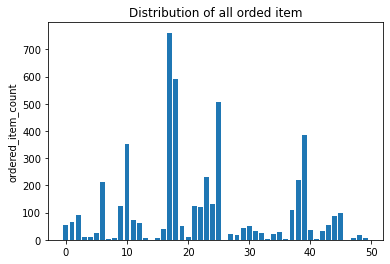

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orded item')

plt.show()

<h1>#문제1</h1>
<h1>value_count()와 unique()의 차이점은?</h1>

value_count()는 series 객체에서 등장하는 모든 데이터 범주를 각각의 개수와 함께 반환하는 함수

unique()는 모든 데이터의 범주만 반환

In [10]:
print(chipo['item_name'].value_counts()[:10])

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Chips                  211
Steak Bowl             211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64


In [11]:
print(type(chipo['item_name'].value_counts()[:10]))

<class 'pandas.core.series.Series'>


In [12]:
print(chipo['item_name'].unique()[:10])

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos']


In [13]:
print(type(chipo['item_name'].unique()[:10]))

<class 'numpy.ndarray'>


<h1>3단계) 데이터 전처리 >>> 전처리 함수 사용</h1>

In [14]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [15]:
print(chipo.info())
print('----------------------------------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
----------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

item_price >>> 객체타입/$붙어잇음

수치 데이터로 사용하기 위해서는 $ 기호 제거해주는 전처리 작업이 필요

방법은 chipo['item_price']에 apply()함수를 적용하면 가능함

앞에 [0]을 슬라이스로 떼어주고 lambda함수로 만들어 주면 편함

In [16]:
chipo['item_price'] = chipo['item_price'].apply(lambda x : float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


apply()함수는 series단위 연산을 처리하는 기능을 수행//

sum() 이나 mean()같이 연산이 정의된 함수를 파라미터로 받는다.

#결론) 문자열 데이터를 수치형으로 바꿔주는 함수로 입력할 수 있음

<h1>4단계) 탐색적 분석: 개념적 탐색 분석</h1>

<주문당 평균 계산 금액 출력>

In [17]:
print(chipo.groupby('order_id')['item_price'].sum())
print('---------------------------------')
print(chipo.groupby('order_id')['item_price'].sum().mean())

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64
---------------------------------
18.811428571428717


<한 주문에 10달러 이상 주문한 주민번호 출력>

10달러 이상인 값 필터링

In [18]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


각 아이템 가격 구하기

1. chipo[chipo.quantity == 1]로 동일 아이템을 1개만 구매한 주문을 선별
2. chipo_one_item.groupby('item_name').min()으로 연산을 수행한 뒤, 그룹별 최저가를 계산
3. item_price를 기준으로 정렬하는 sort_values() 함수를 적용// sort_values() >> series데이터 정렬해주는 함수

In [19]:
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


각 그래프 아이템 가격 분포와 가격 히스토그램을 나타냄

2~4달러, 혹은 6~8달러 정도의 아이템 가격대가 형성되어 있음을 알 수 있다.

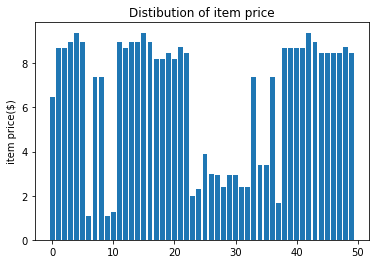

In [20]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title("Distibution of item price")

plt.show()

아이템 가격 히스토그램을 출력한다.

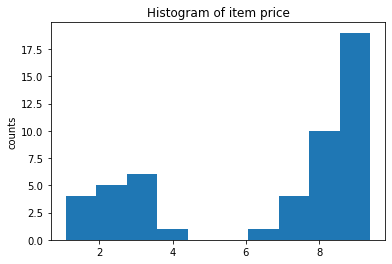

In [21]:
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

In [22]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


결과에서 가장 비싼 주문에서 23개 아이템을 주문한 것을 알 수 있음

veggie salad bowl 이 몇번 주문되었는지 알아보기

chipo[chipo['item_name'] == 'Veggie Salad Bowl'] 필터링 후 drop_duplicates() 함수 사용

이유 : item_name 이 중복 집계된 경우를 제거해주기 위해서
최종 결과로 chipo_salad 길이 출력하면 'Veggie Salad Bowl' 이 데이터 내에서 몇번이나 주문 되었는지 구 할수 있다.

In [23]:
chipo_salad = chipo[chipo['item_name'] == 'Veggie Salad Bowl']
chipo_salad = chipo_salad.drop_duplicates(['item_name','order_id'])

print(len(chipo_salad))
chipo_salad.head(18)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75


Chicken Bowl 2개 이상 주문 횟수 구하기

In [24]:
chipo_chicken = chipo[chipo['item_name'] == 'Chicken Bowl']
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(10)

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
1100    2
1115    2
1160    2
1170    3
1176    3
Name: quantity, dtype: int64